In [3]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 29.4 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.48.3
    Uninstalling transformers-4.48.3:
      Successfully uninstalled transformers-4.48.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.1/342.1 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━

In [40]:
from datasets import load_dataset

emotion = load_dataset('emotion')
emotion.set_format(type='pandas')

In [3]:
!pip install datasets --upgrade



In [41]:
emotion


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [42]:
df = emotion['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [43]:
classes = emotion['train'].features['label'].names
classes

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [44]:
df['label_name']= df['label'].apply(lambda i : classes[i])

In [45]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [46]:
import matplotlib.pyplot as plt

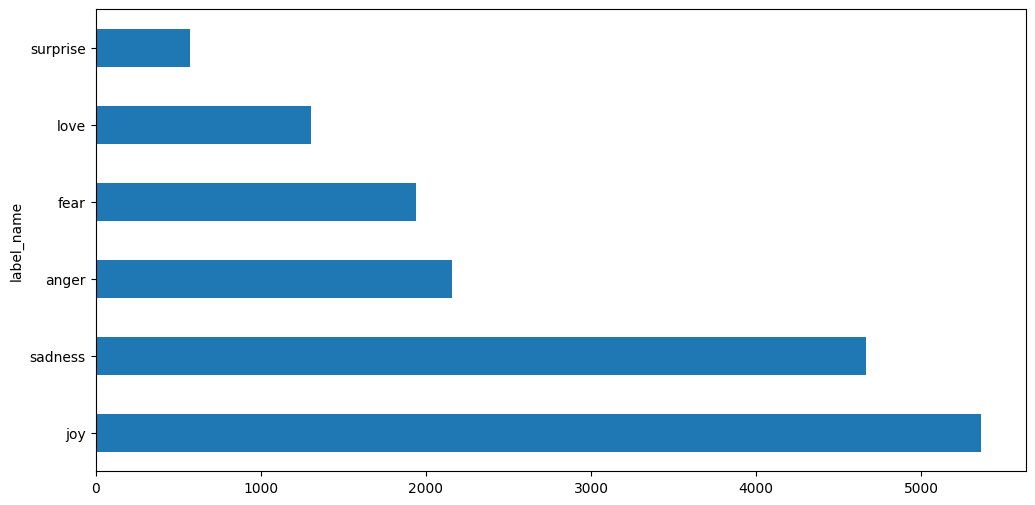

In [47]:
plt.figure(figsize=(12,6))
df["label_name"].value_counts(ascending= False).plot.barh()
plt.show()

<Axes: title={'center': 'words_per_tweet'}, xlabel='label_name'>

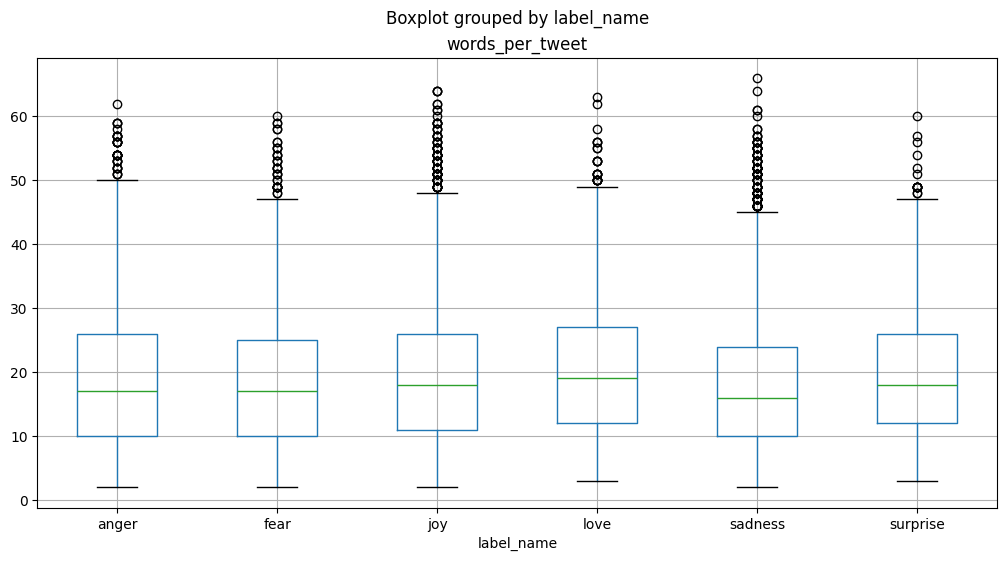

In [48]:
df['words_per_tweet']=df['text'].str.split().apply(len)
df.boxplot("words_per_tweet", by = 'label_name', figsize=(12,6))

## Tokenization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [49]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [50]:
type(emotion)

datasets.dataset_dict.DatasetDict

In [51]:
emotion.reset_format()

In [52]:
type(emotion)

datasets.dataset_dict.DatasetDict

In [53]:
emotion['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [54]:
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [55]:
def tokenize(batch):
  temp = tokenizer(batch["text"], padding= True, truncation= True)
  return temp

tokenize(emotion['train'][:2])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [56]:
emotion_encoded = emotion.map(tokenize, batched = True , batch_size= None)

In [57]:
emotion_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

## Model Building

In [58]:
from transformers import AutoModelForSequenceClassification
import torch
device  = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_labels = len(classes)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels= num_labels)
mode = model.to(device)



Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [59]:
device

device(type='cuda')

In [60]:
from transformers import TrainingArguments
batch_size = 64
model_name = 'distilbert-finetuned-emotion'
training_args= TrainingArguments(output_dir= model_name,
                                 num_train_epochs= 3,
                                 learning_rate= 2e-5,
                                 per_device_train_batch_size= batch_size,
                                 per_device_eval_batch_size= batch_size,
                                 weight_decay= 0.01,
                                 evaluation_strategy= "epoch",
                                 save_strategy= "epoch",
                                 load_best_model_at_end= True,
                                 disable_tqdm= False,
                                 run_name="Sentiment_analysis",
                                 report_to="none")

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average='weighted')
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}

In [62]:
from transformers import Trainer
trainer = Trainer(model= model ,args = training_args,
                  compute_metrics= compute_metrics,
                  train_dataset= emotion_encoded['train'],
                  eval_dataset= emotion_encoded['validation'],
                  tokenizer= tokenizer
                  )

<ipython-input-62-aae78a5f8f2f>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model= model ,args = training_args,


In [63]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.282072,0.916500,0.916772
2,0.518300,0.185210,0.930500,0.931080
3,0.518300,0.163037,0.933000,0.933017


TrainOutput(global_step=750, training_loss=0.39556360880533853, metrics={'train_runtime': 382.2179, 'train_samples_per_second': 125.583, 'train_steps_per_second': 1.962, 'total_flos': 1080514292544000.0, 'train_loss': 0.39556360880533853, 'epoch': 3.0})

In [65]:
preds_outputs = trainer.predict(emotion_encoded['test'])
preds_outputs.metrics

{'test_loss': 0.17572808265686035,
 'test_accuracy': 0.924,
 'test_f1': 0.9236318995613759,
 'test_runtime': 3.7205,
 'test_samples_per_second': 537.557,
 'test_steps_per_second': 8.601}

In [92]:
preds_outputs

PredictionOutput(predictions=array([[ 5.1872487 , -1.140093  , -1.4721047 , -0.63268477, -1.6210554 ,
        -1.676604  ],
       [ 5.2210426 , -1.0104021 , -1.4400079 , -0.6587603 , -1.4721465 ,
        -1.7988051 ],
       [ 5.2276387 , -1.1081396 , -1.4056871 , -0.84759974, -1.2090265 ,
        -1.7147498 ],
       ...,
       [-1.2102445 ,  5.20201   , -0.7705024 , -1.5881641 , -1.6464871 ,
        -1.2706847 ],
       [-1.2869681 ,  4.979714  , -0.9560314 , -1.5922166 , -1.1919231 ,
        -1.2801895 ],
       [-1.2804784 , -1.714861  , -1.6389626 , -1.6492813 ,  2.6036022 ,
         2.3423975 ]], dtype=float32), label_ids=array([0, 0, 0, ..., 1, 1, 4]), metrics={'test_loss': 0.17572808265686035, 'test_accuracy': 0.924, 'test_f1': 0.9236318995613759, 'test_runtime': 3.7205, 'test_samples_per_second': 537.557, 'test_steps_per_second': 8.601})

In [67]:
preds_outputs.predictions[:2]

array([[ 5.1872487 , -1.140093  , -1.4721047 , -0.63268477, -1.6210554 ,
        -1.676604  ],
       [ 5.2210426 , -1.0104021 , -1.4400079 , -0.6587603 , -1.4721465 ,
        -1.7988051 ]], dtype=float32)

In [72]:
emotion_encoded['test']

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 2000
})

In [73]:
emotion_encoded['test']['label']



[0,
 0,
 0,
 1,
 0,
 4,
 3,
 1,
 1,
 3,
 4,
 0,
 4,
 1,
 2,
 0,
 1,
 0,
 3,
 1,
 0,
 1,
 1,
 0,
 0,
 4,
 3,
 0,
 4,
 3,
 4,
 3,
 0,
 3,
 0,
 1,
 1,
 0,
 1,
 1,
 3,
 0,
 1,
 0,
 1,
 3,
 1,
 1,
 4,
 4,
 0,
 4,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 3,
 0,
 0,
 1,
 1,
 0,
 5,
 0,
 3,
 4,
 5,
 1,
 2,
 5,
 1,
 2,
 3,
 1,
 0,
 1,
 2,
 1,
 3,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 4,
 3,
 4,
 3,
 3,
 2,
 0,
 3,
 0,
 0,
 0,
 0,
 4,
 3,
 3,
 1,
 1,
 4,
 0,
 1,
 2,
 4,
 1,
 0,
 1,
 1,
 4,
 0,
 1,
 0,
 1,
 0,
 3,
 0,
 2,
 0,
 4,
 0,
 0,
 1,
 2,
 0,
 3,
 3,
 1,
 4,
 3,
 0,
 1,
 1,
 0,
 4,
 1,
 1,
 0,
 1,
 4,
 4,
 2,
 0,
 2,
 5,
 0,
 1,
 0,
 1,
 1,
 3,
 0,
 3,
 3,
 1,
 4,
 4,
 1,
 2,
 2,
 2,
 0,
 2,
 3,
 1,
 1,
 0,
 3,
 1,
 1,
 0,
 0,
 4,
 1,
 0,
 2,
 4,
 0,
 1,
 1,
 4,
 3,
 1,
 0,
 1,
 3,
 0,
 0,
 4,
 4,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 4,
 4,
 1,
 3,
 0,
 1,
 4,
 1,
 0,
 3,
 0,
 3,
 3,
 1,
 4,
 5,
 1,
 1,
 1,
 3,
 1,
 2,
 4,
 0,
 0,
 1,
 1,
 4,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 4,
 1,
 0,
 0,
 0,
 3,
 1,
 5,


In [75]:
import numpy as np
y_preds = np.argmax(preds_outputs.predictions, axis=1)
y_true = emotion_encoded['test']['label']

In [76]:
from sklearn.metrics import classification_report
print(classes)
print(classification_report(y_true, y_preds))

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       581
           1       0.95      0.94      0.95       695
           2       0.82      0.83      0.82       159
           3       0.93      0.93      0.93       275
           4       0.86      0.91      0.89       224
           5       0.80      0.67      0.73        66

    accuracy                           0.92      2000
   macro avg       0.89      0.87      0.88      2000
weighted avg       0.92      0.92      0.92      2000



In [85]:
df['label_name'].value_counts()

,count
label_name,
joy,5362
sadness,4666
anger,2159
fear,1937
love,1304
surprise,572


In [87]:
text = 'H-1B process is so frustrating for international students to get a job in the USA'
input_encoded = tokenizer(text, return_tensors='pt').to(device)
with torch.no_grad():
  outputs = model(**input_encoded)

logits = outputs.logits
pred = torch.argmax(logits, dim=1).item()
pred, classes[pred]

(0, 'sadness')

In [90]:
text = 'I loved the movie date.'
input_encoded = tokenizer(text, return_tensors='pt').to(device)
with torch.no_grad():
  outputs = model(**input_encoded)

logits = outputs.logits
pred = torch.argmax(logits, dim=1).item()
pred, classes[pred]

(2, 'love')

In [91]:
text = 'I finally got the job'
input_encoded = tokenizer(text, return_tensors='pt').to(device)
with torch.no_grad():
  outputs = model(**input_encoded)

logits = outputs.logits
pred = torch.argmax(logits, dim=1).item()
pred, classes[pred]

(1, 'joy')

In [93]:
trainer.save_model('BERT_Multiclass_Emotion_Classifier')